In [1]:
# Imports
from src.utils import utils
from src.data.dataset_loading import load_articles, load_links, load_unfinished_paths, load_finished_paths, load_categories
from src.utils.result_generator import *


Load necessary files for analysis

In [2]:
# Load the unfinished paths dataFrame
df_unfinished = load_unfinished_paths()

# Load the finished paths dataFrame
df_finished = load_finished_paths()

# Load the categories dataframe
df_categories = load_categories()

# Load links
df_links = load_links()

# Load articles
df_articles = load_articles()

### Important filtering

**Most significant filters**

- **Excluding short paths**: paths with a `path_length ≤ 2` are removed, as they indicate no meaningful progression.
- **Focus on restarts**: Only paths where the quitting `type` is `"restart"` for unfinished dataset are retained, reflecting deliberate quitting behavior.
- **Time per click**: the average time per click is calculated as `durationInSec / path_length`.
  Paths with `avg_time_click > 180` are excluded to filter out implausibly long durations.

# Correlations with quitting

## 1. Target category - Simple correlations

- We would expect the difficulty of a game to be proportional to its 'quitting' rate.

- One can infer the intrisic difficulty of a game is connected to the target article it must be reached (as well as the path connecting it to it the source article).

- Are some targets intrisically harder than others just as a function of the knowledge category the belong to?

**1.1 Correlation between target's main category, difficulty and proportion of unfinished games**

1.1.1 Computation of number of unfinished paths according to main category of target article (normalizing by total count of that target category for both unfinished and finished games)



In [3]:
target_categories_unf_norm = plot_main_categories_prop_unfinished_games(df_unfinished, df_finished)


**Results 1.1.1: Target (main) categories ordered by proportion of unfinished games**

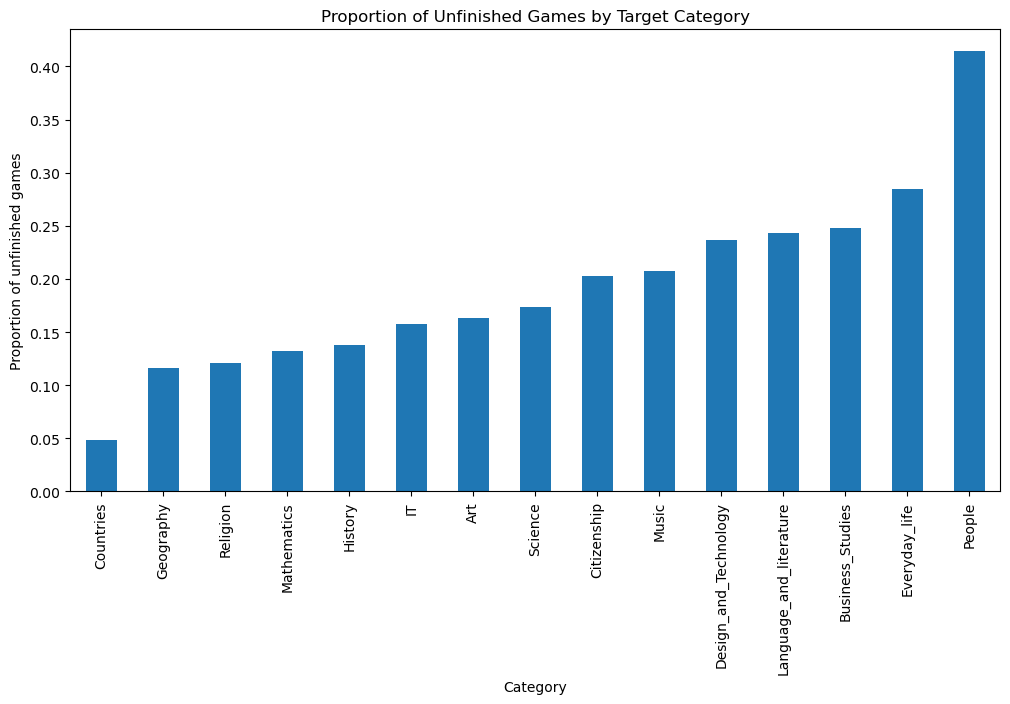

In [4]:
plot_target_cateries_unf_norm(target_categories_unf_norm)


1.1.2 Target categories are ordered by difficulty ('rating') of finished paths 
  - Only finished games have a value for difficulty('rating') of path

In [5]:
prop_nan(df_finished)

average_rating = target_barplot_cat_difficulty(df_finished)

 Proportion of NaN for 'rating' column:
 44.42 %


**Results 1.1.2: Target (main) categories ordered by level of difficulty**

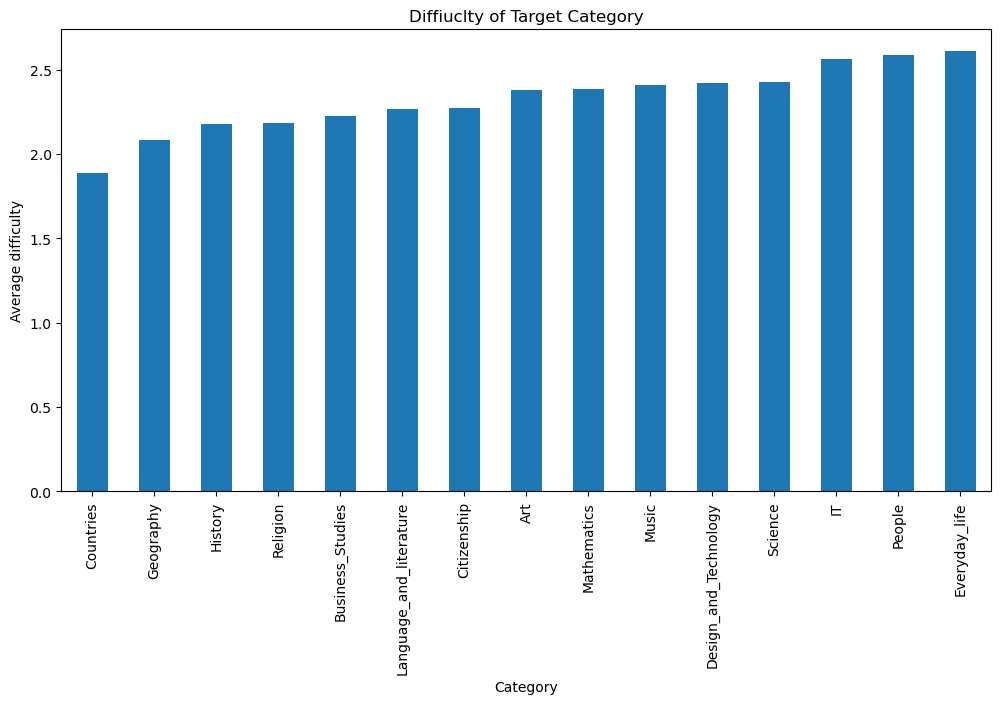

In [6]:
plot_target_rating_rank(average_rating)

1.1.3 Merging target category average difficulty and its corresponding proportion of unfinished games
through **Spearman's coefficient for quantifying correlation and linear regression analysis for visualization**


Spearman correlation: 0.6392857142857141
P-value: 0.010288446619594207


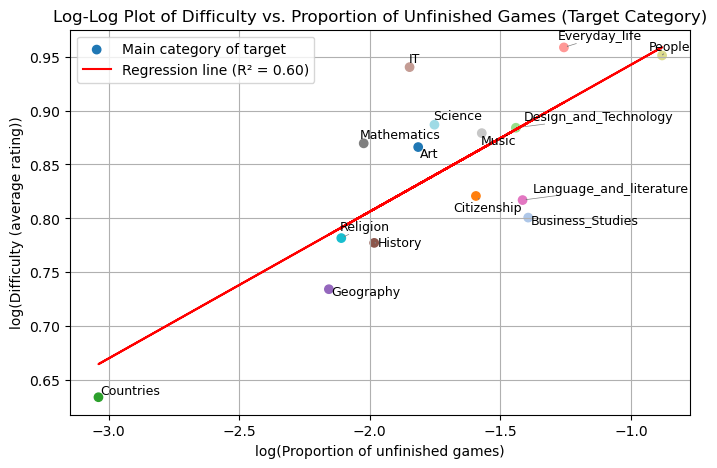

In [7]:
results_categories(target_categories_unf_norm, average_rating)

### 1.1.4 Conclusions of correlations between target's main category, diffficulty and probability of quitting

- There seems to exist a correlation between the target's difficulty and the 'quitting' proportion:
    - The relatively high **$R^2$ value** (0.66) in the log-log model indicates a positive relationship between difficulty and proportion of unfinished games for the different topics. 
    - Similarlty,the **Spearman correlation** of 0.696 suggests a moderate positive monotonic relationship between the proportion of unfinished games and difficulty (average rating) for the different topics; the low p-value (0.0039) indicates that this correlation is statistically significant.

- The categories 'People' and 'Everyday Life' rank high in both difficulty and the proportion of unfinished games, while 'Geography' and 'Countries' rank low for bot
    - This suggests  'People' and 'Everyday Life' are intrinsically more conceptually challenging for users.
        - **'People'**
            -  'People' category, after reassigning historically significant figures to other categories like History, Science, and Art, primarily includes modern, popular figures (e.g., actors, sports figures, and media personalities).

            - If users do not have specific knowledge on these individuals it would be more challenging for them to find a path. 
            - In fact, when the analysis was repeated including historically significant figures in 'People', the difficulty and abandonment rates for 'People' were lower (mid-range).  
        - **'Everyday Life'**
           - The 'Everyday Life' category often consists of specific concepts that might not have obvious or direct connections (e.g,:'Bean'), while other topics as 'History' or 'Countries' have universally understood links (e.g., historical events, countries with neighboring borders).

    - 'Countries' and 'Geography' should be conceptually easier to navigate as logical and hierarchical connections are evident (e.g., France → Europe → Paris), users are expected to have a have basic knowledge of geography, and there are multiple connections between countries and, history and culture.

**1.2 Correlation between target's secondary category, difficulty and proportion of unfinished games**

- Analysis for top '50' secondary categories with more article counts (for unfinished and finshed paths).

- Same structure as in previous analysis

1.2.1 Top 50 secondary categories

In [8]:

# Filter the DataFrame to include only rows with `category2` in the top categories
df_target_categories_finished , df_target_categories_unfinished = top_50_categories(df_finished, df_unfinished)




1.2.2 Proportion of unfinished paths and average difficulty per secondary category

In [9]:
target_categories_unf_norm_2, average_rating_2 = subcategories_metrics( df_target_categories_unfinished,df_target_categories_finished )




1.2.3 Merging average rating and proportion of unfinished paths through Spearman's correlation and linear regression

Spearman correlation: 0.6915412136738459
P-value: 2.689840422967863e-08


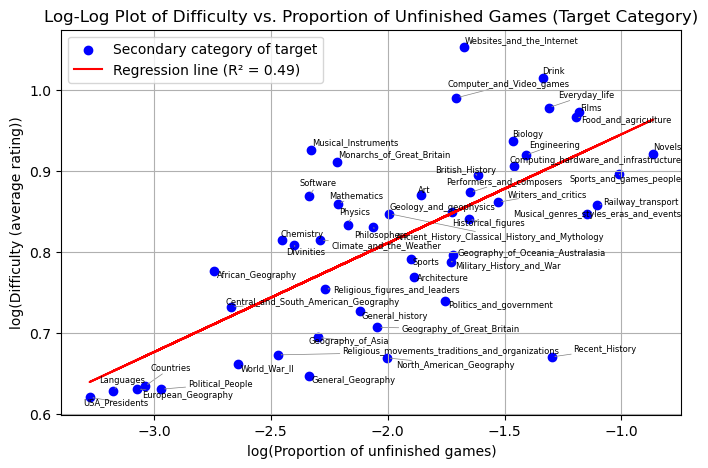

In [10]:
results_subcategories(target_categories_unf_norm_2, average_rating_2)

### 1.1.4 Conclusions of correlations between target's secondary category, diffficulty and probability of quitting

- There seems to exist a correlation between the target's difficulty and the 'quitting' proportion of a path:
    - The relatively high **$R^2$ value** (0.52) in the log-log model indicates a positive relationship between difficulty and proportion of unfinished games for the different secondary topics. 
    - Similarlty,the **Spearman correlation** of 0.698 suggests a moderate positive monotonic relationship between the proportion of unfinished games and difficulty (average rating) for the different topics; the low p-value (0.1.75e-08) indicates that this correlation is statistically significant.

- Specific topics (e.g; 'Novels', 'Films', 'Railway Transport') have higher difficulty and abandonment as they might have less intuitive links with other areas of the article network; conceptually, it wouls also be more complicated to establish connections unless someone had a very specific knowledge about the topic.

- 'Countries', 'Languages', 'European Geography', and 'USA Presidents' have low difficulty ratings and quitting rates, likely because they’re widely recognized by a large portion of players. The low difficulty of 'USA Presidents' may reflect either a higher proportion of U.S. players or a universal knoweledge of U.S history.

- Some categories such as 'Recent History' and 'North American Geography' present low difficulty ratings, but higher abandonment proportions, possibly due to the presence of specific articles (more niche) that lower the average. For example, the article 'Jyllands-Posten_Muhammad_cartoons_controversy ' categorized in 'Recent History'.



### 1.1.5 Survivor Bias
A curious observation : Recent History shows a high proportion of unfinished games but a low difficulty rating, while General History has fewer dropouts. 

 A considerable portion of articles in Recent History have high dropout rates (e.g., Hannibal Barca, Jyllands-Posten Muhammad cartoons controversy). In the few games that have been finished, the articles may appear deceptively easy because only the most determined or knowledgeable managed to complete them-skewing the difficulty rating.
To account for this, we filtered target articles with at least two finished games per unfinished one: 

Spearman correlation: 0.7969747899159663
P-value: 4.395020774280983e-12


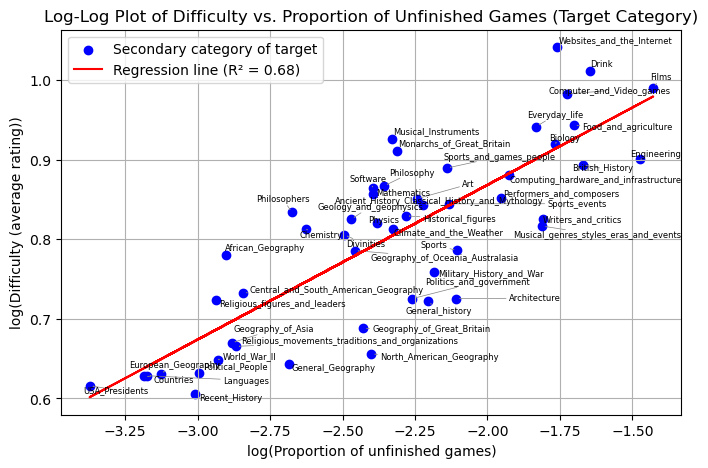

In [24]:
# Filtering according so two finished game per un unfinished game
df_finished_filtered, df_unfinished_filtered = filtering_finished_ratio(df_finished, df_unfinished)



# Repeating analysis
df_target_categories_finished , df_target_categories_unfinished = top_50_categories(df_finished_filtered, df_unfinished_filtered)
target_categories_unf_norm_2, average_rating_2 = subcategories_metrics( df_target_categories_unfinished,df_target_categories_finished )
results_subcategories(target_categories_unf_norm_2, average_rating_2)



### 1.1.5 Conclusions for Survivor Bias

- The fit has improved; better correlation, taking into account survivor bias.
- We do not longer observe spurious results for subcategories, with opposite values of estimated difficulty and ratio of unfinished games.

## 2. Target category - Graph correlations

- Have added categories for articles with links and no category:
Articles with source link and no category
['Friend_Directdebit' 'Pikachu' 'Sponsorship_Directdebit']
Articles with target link and no category
['Directdebit' 'Pikachu' 'Friend_Directdebit']

- Some articles do not have source links although by semantic association they should.
For example, 'Osteomalacia' has no outgoing links, although it can be reached from others as 'Vitamin D'. Even though there are mentions to 'Vitamin D' in the 'Osteomalacia' article, a target link to the article is not associated:

'Chronic administration of diphenylhydantoin leading to excessive metabolism of **Vitamin D**...'

- Some articles do not have any associated link


- **Limited connections**: games does not fully capture topics connectivity.

 2.1 Graph creation 

In [12]:
# Articles as nodes; links as edges

G, dict_connections = graph_creation(df_categories,df_links)

2.2 Compuation of different graph related metrics

In [13]:
# Compute metrics for all nodes

pagerank = nx.pagerank(G, alpha=0.85)
closeness_centrality = nx.closeness_centrality(G)


#betweenness_centrality = nx.betweenness_centrality(G)
#degree_centrality = nx.degree_centrality(G)


2.2.1 Average metrics by main topic of  article 

- Initally, analysed:  'Average Closeness Centrality', 'Average Degree Centrality', 'Average PageRank'
        'Average Betweenness Centralitty'.
- All had almost perfect linear correlation, except 'Average Closeness Centrality' 
- Hence, in order to retain the most significant information only 'Average Closeness Centrality'  and 'Average PageRank' will be included.

In [14]:
#  Dictionary for storing metrics per category
df_metrics = categories_node_metric(df_categories, closeness_centrality, pagerank, G)


2.2.2 Linear regression between nodes metrics and proportion of unfinished games corresponding to category of target article

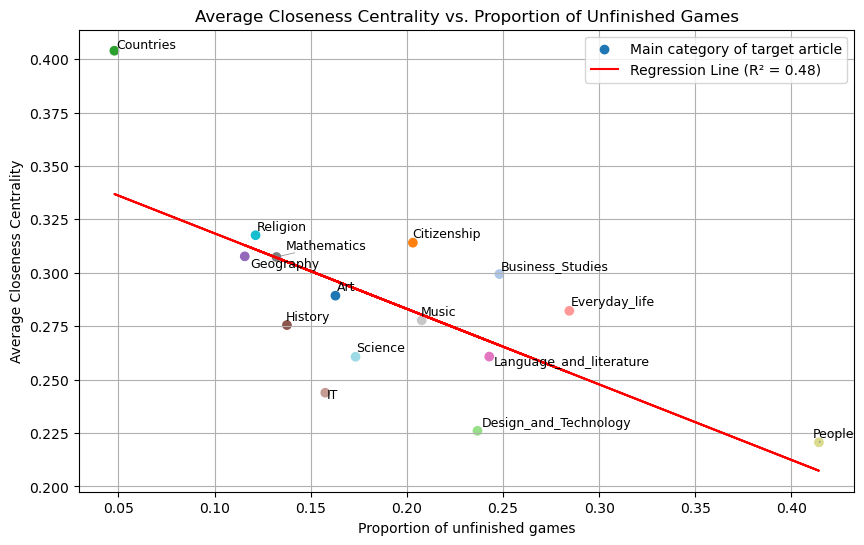

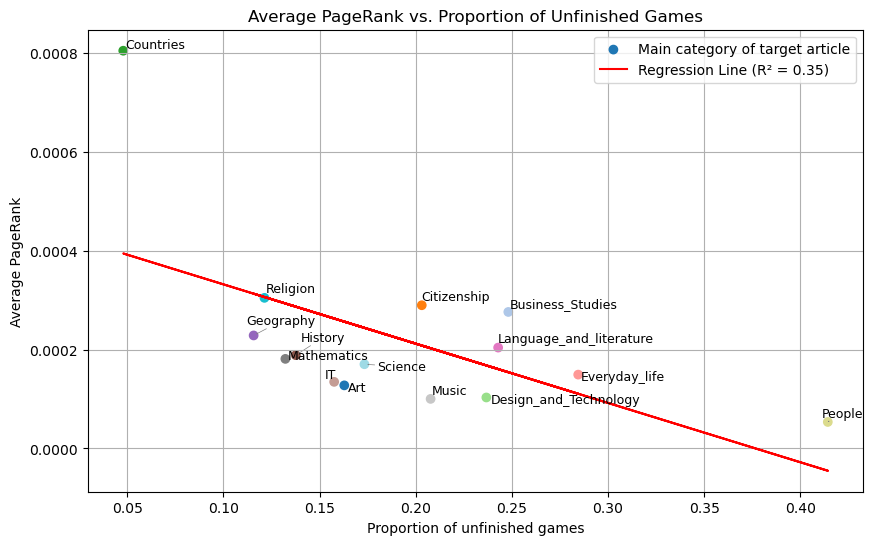

In [15]:
regression_node_metrics(df_metrics,target_categories_unf_norm )

**2.2.3 Conclusions: correlation between the graph metrics for a given topic and the associated propotion of unfinished games for that topic (in the target)**

- Categories with high network connectivity (high centrality) , like 'Countries' and 'Geography', facilitate user navigation, decreasing abandonment. In contrast, specific categories (e.g., 'People' and 'Everyday Life') have lower connectivities, making them challenging to navigate and prone to quitting.

- Hence, the conceptual relationships inferred above between the main categories and path difficulty, are supported by the physical constraints of the network.

### 2.3 Studying games according to their shortest path length

**2.3.1 Statistics for finished and unfinished games as a function of shortest length path**


- We have obtained shortest length path for combinations of source and target that appear in both datasets:

In [16]:
# Unique categories
unique_categories = df_categories['category1'].unique()

# Dataframes with combinations  of source and target and shortest path length
df_path_network_finished, df_path_network_unfinished = generator_shortest_paths(df_finished, df_unfinished, unique_categories, G, df_categories, dict_connections)

No path exists
No path exists


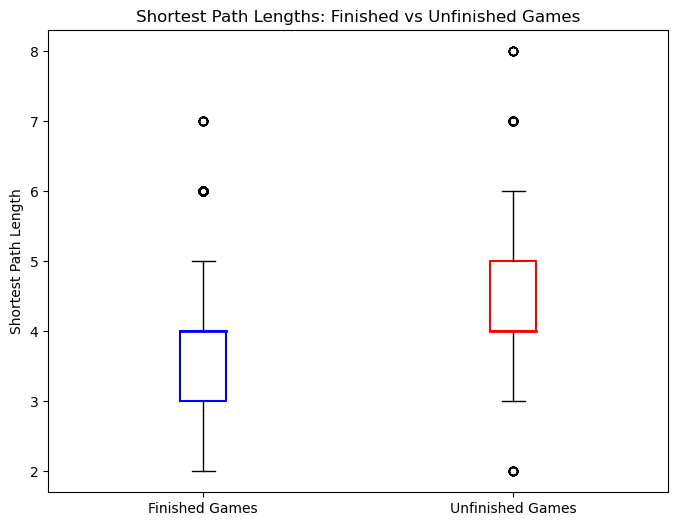

count    28109.000000
mean         3.845103
std          0.707901
min          2.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: len_shortest_path, dtype: float64
count    7974.000000
mean        4.334086
std         0.793331
min         2.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         8.000000
Name: len_shortest_path, dtype: float64


In [17]:
boxplot_shortest_path_length( df_path_network_finished,df_path_network_unfinished)
print(df_path_network_finished['len_shortest_path'].describe())
print(df_path_network_unfinished['len_shortest_path'].describe())

**2.3.1 Conclusions: statistics for finished and unfinished games**

- Finished games have lower median and max shortest paths than unfinished games.

### 2.3.2  Studying game difficulty according to their shortest path length


R^2 value: 0.9972
threshold:0.5


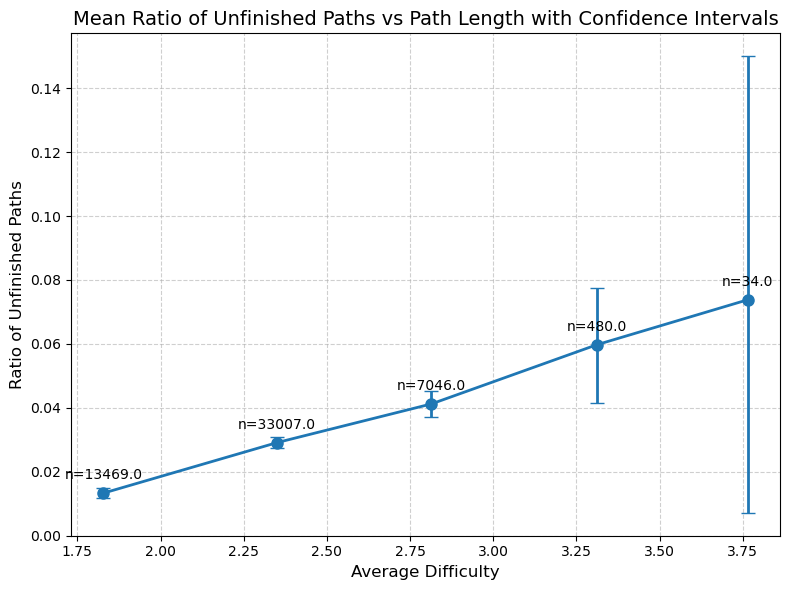

In [18]:
shortest_path_length_difficulty_ci(df_path_network_unfinished, df_unfinished,  df_path_network_finished,
                                       df_finished)

**2.3.2 Conclusions: Studying game difficulty according to their shortest path length**

- We have obtained metric that allows to compare paths according to a more objective difficulty metric.

### 2.3.3  Studying median node metrics along their position in shortest path length

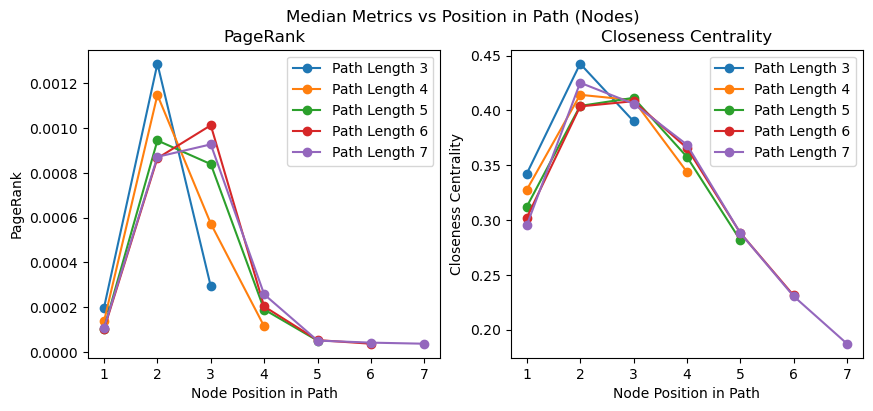

In [19]:
analysis_shortest_path_metrics(df_path_network_unfinished, df_path_network_finished, pagerank, closeness_centrality)



**2.3.3 Conclusions: Studying median node metrics along their position in shortest path length**

- Can be seen how Pagerank and closeness centrality peak in intermediate nodes, where graph goes through node with high connectivity that allows to traverse regions of graph until getting closer to target. 
- Then both metrics decrease as path get closer to target.

### 2.3.4  Studying median closeness  centrality and pageranl along finished and unfinished paths as a function of node position in path

c:\Users\beaiz\OneDrive\Documentos\EPFL\ADA\Project\ada-2024-project-ibm\src\utils\result_generator.py:1214: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


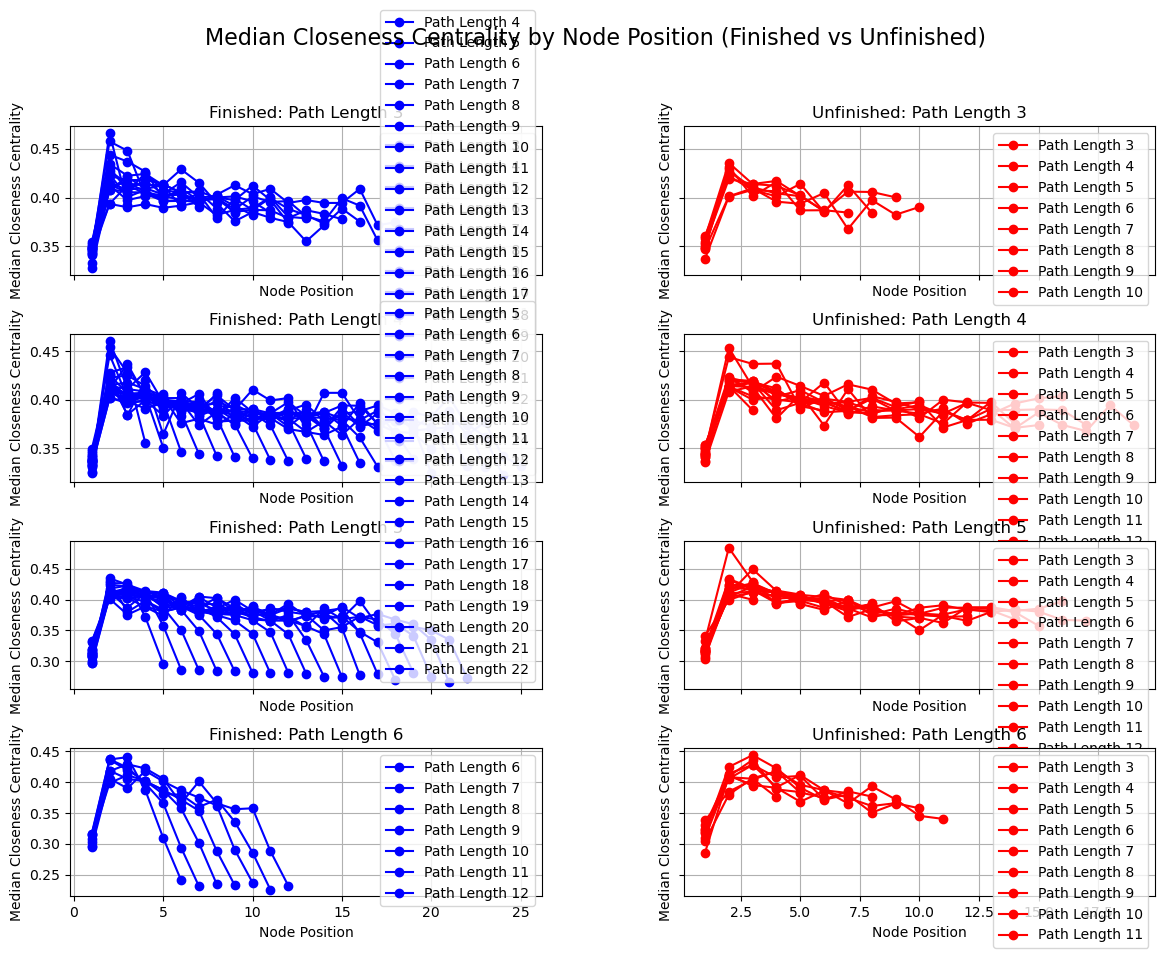

c:\Users\beaiz\OneDrive\Documentos\EPFL\ADA\Project\ada-2024-project-ibm\src\utils\result_generator.py:1095: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


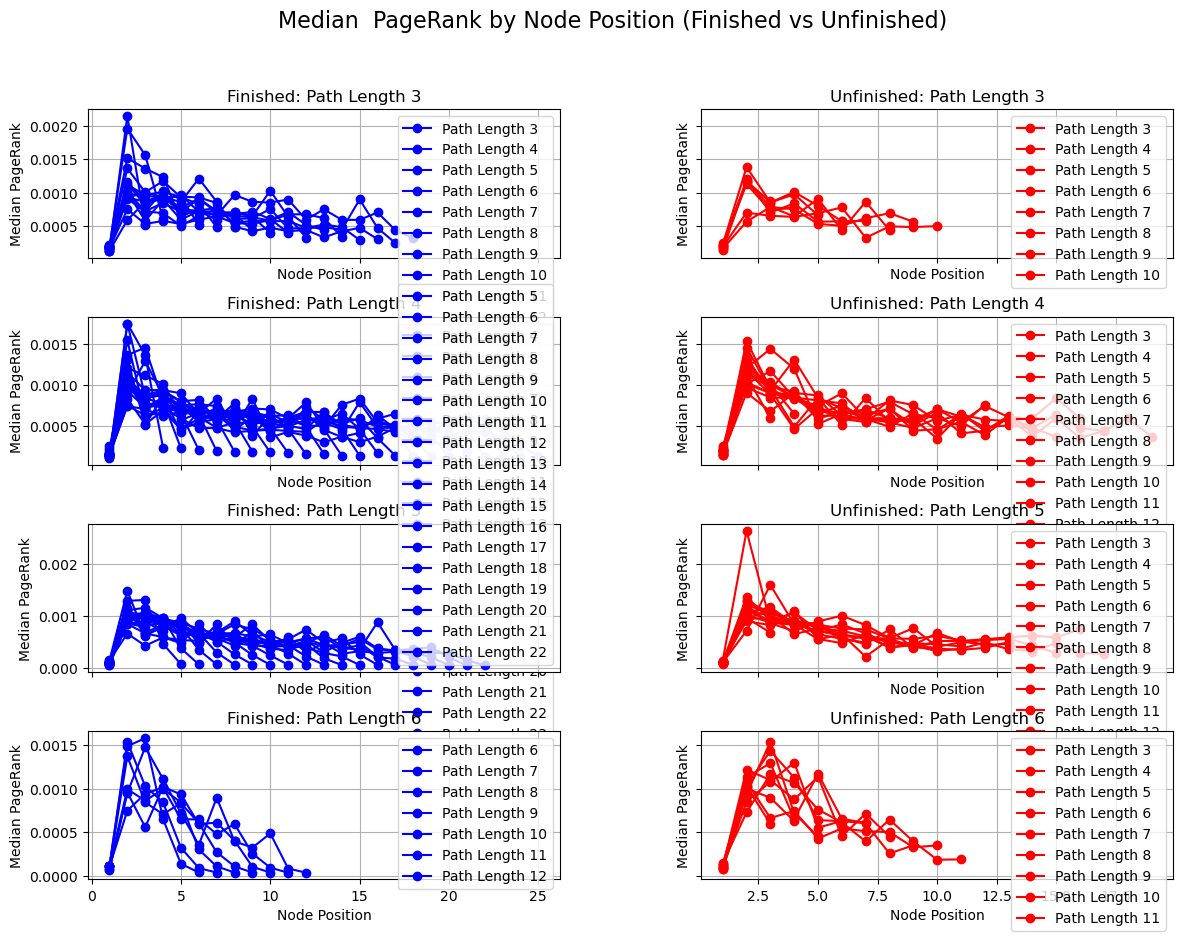

In [20]:

closeness_all_paths(df_path_network_finished, df_path_network_unfinished,
    df_finished, df_unfinished, closeness_centrality)

pagerank_all_paths(df_path_network_finished, df_path_network_unfinished,
    df_finished, df_unfinished, pagerank)

- We realize shortest longer paths should not have systematically lower paths associated.
- By studying total number of games in each group according to shortest path length, it is noticed that the groups with shortest path lengths have a much higher number of games that others.
- We balance dataset and repeat for groups of shortest path length 4 and 5; and repeat analysis for closeness metric.
- This time, we obtain expected results.

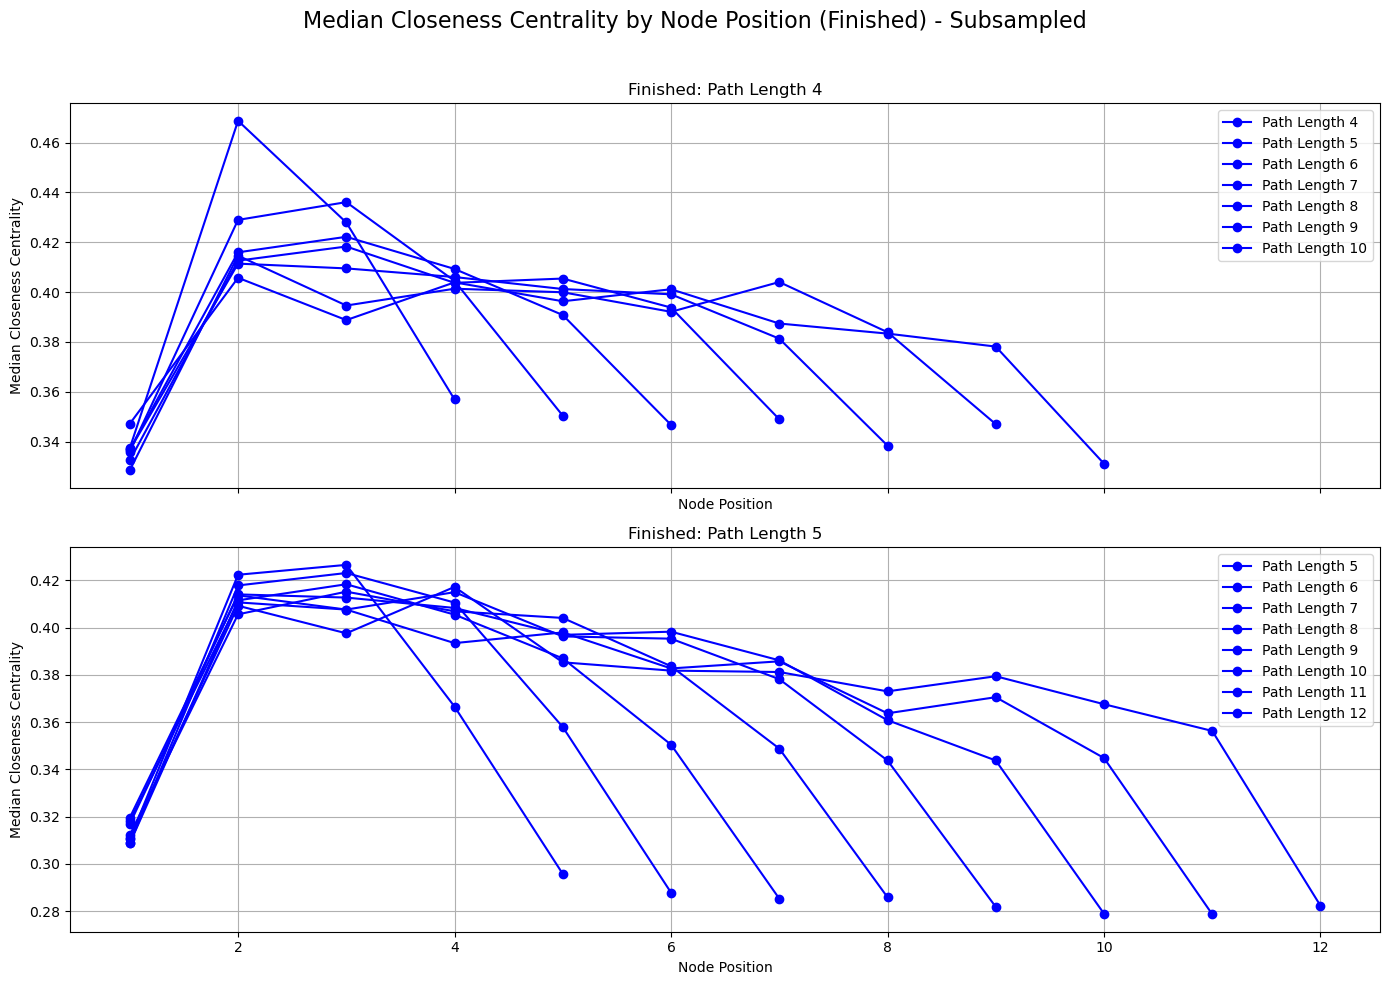

In [21]:
bias_oversampling(
    df_path_network_finished, df_path_network_unfinished, df_finished, df_unfinished, closeness_centrality
)

**2.3.4 Conclusions: studying median closeness centrality along finished and unfinished paths as a function of node position in path**

- The success of victorious players lies in their ability to identify a critical node—a node characterized by sufficiently low Closeness Centrality and PageRank that provides a direct pathway to the target. This critical node is often the penultimate or antepenultimate step in the path. Once this node is located, the conceptual connection to the target becomes relatively straightforward.


- Good players: successful players who complete the game in fewer steps demonstrate a clear ability to reach the critical node more quickly, minimizing unnecessary exploration.

- Mediocre players: while still victorious, these players exhibit a more gradual decrease in metrics along their path, visiting nodes that decline steadily in their influence before arriving at the critical node.


- Unsuccessful players also display some degree of progression:

    - They are able to locate influential nodes and begin a steady decline in metrics.
    - However, they fail to identify the critical node that connects them to the target, ultimately leading to their inability to complete the path.

### 2.3.5  Studying median distance to target node along finished and unfinished paths as a function of node position in path

C:\Users\beaiz\AppData\Local\Temp\ipykernel_16320\1771330642.py:135: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


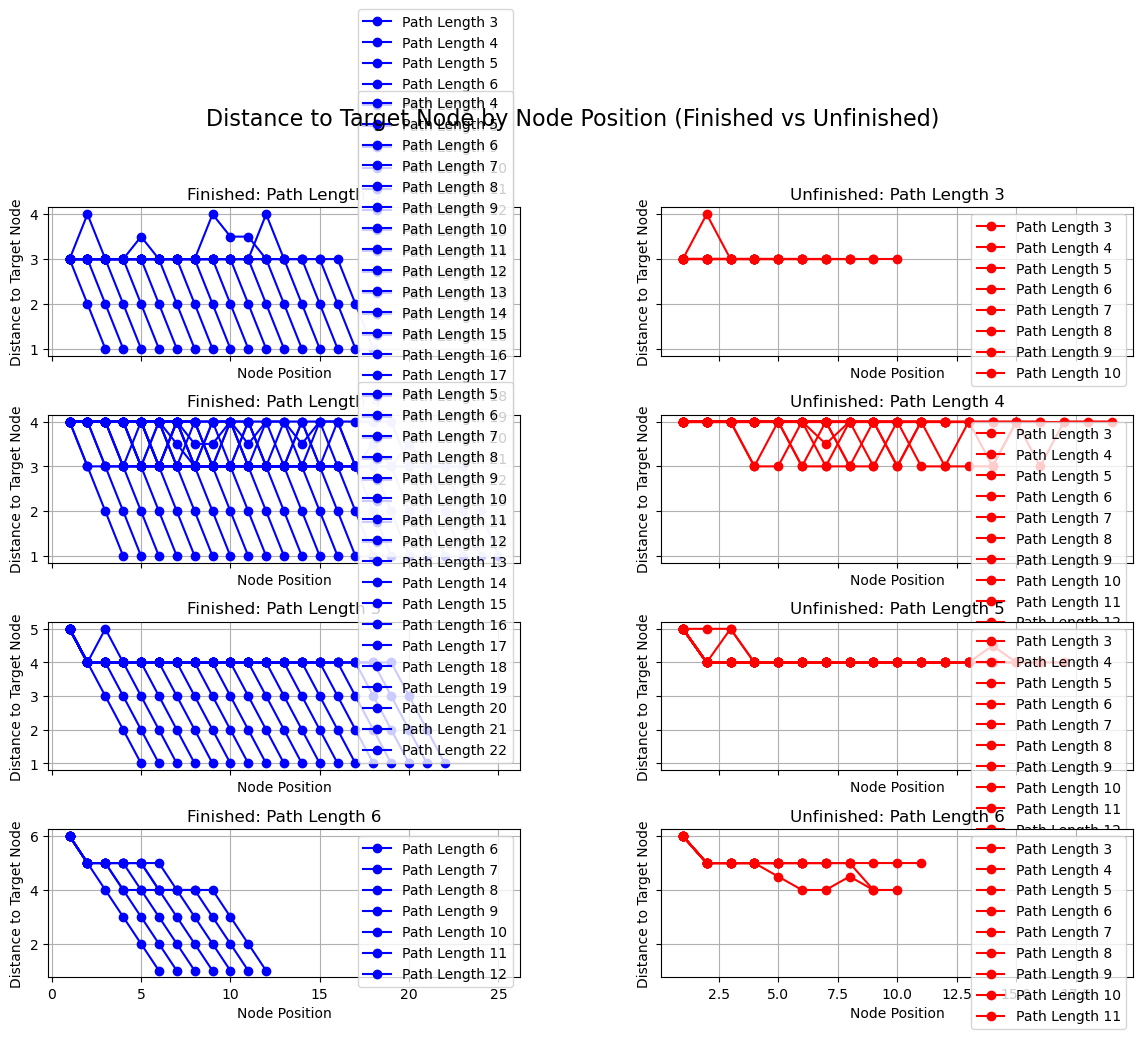

In [23]:
distance_to_target_plot(df_path_network_finished,df_path_network_unfinished,df_finished, df_unfinished, G)

**2.3.5 Conclusions: Studying median distance to target node along finished and unfinished paths as a function of node position in path**

- In both groups, we see stagnation.
- In finished, players find critical node; while in unfinished, players are not able to find it; and just circle around it.